In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3504.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3926.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3721.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3851.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3749.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3975.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3223.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3577.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3615.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3931.txt


In [2]:
import os
import random
import cv2
import numpy as np
from IPython.display import display, Image
from tqdm import tqdm 
import random
import matplotlib.pyplot as plt
import yaml
import shutil

In [3]:
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
!pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 38.64 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/kaggle/working/yolov7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.4 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bayesian-optimization 2.0.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bigframes 1.29.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.88 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
feat

In [4]:
%cd yolov7

/kaggle/working/yolov7


In [5]:
!cp -r /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5 /kaggle/working/

In [6]:
coco128 = """# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /kaggle/working/JU_yolov5  # dataset root dir
train: /kaggle/working/JU_yolov5/train  # train images 128 images
val: /kaggle/working/JU_yolov5/valid  # val images 128 images
test: /kaggle/working/JU_yolov5/valid # test images (optional)

# Classes
nc: 14  # number of classes
names: ['trak', 'cyclist', 'bike', 'tempo', 'car', 'zeep', 'toto', 'e-rickshaw', 'auto-rickshaw', 'bus', 'van', 'cycle-rickshaw', 'person', 'taxi'] # class names
"""

with open('/kaggle/working/yolov7/JU_yolov5.yaml', 'w') as f:
  f.write(coco128)

In [7]:
!wandb disabled
!python train.py --img 640 --batch 16 --epochs 30 --data '/kaggle/working/yolov7/JU_yolov5.yaml'  --weights '/kaggle/working/yolov7/yolov7.pt' --project '/kaggle/working/training_backup' --name 'taffic' --workers 8 --device 0 --cfg cfg/training/yolov7.yaml --hyp data/hyp.scratch.p5.yaml

W&B disabled.
2025-03-07 19:03:48.622233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-07 19:03:48.943704: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-07 19:03:49.001823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
100%|██████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 86.0MB/s]

/kaggle/working/yolov7/train.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code dur

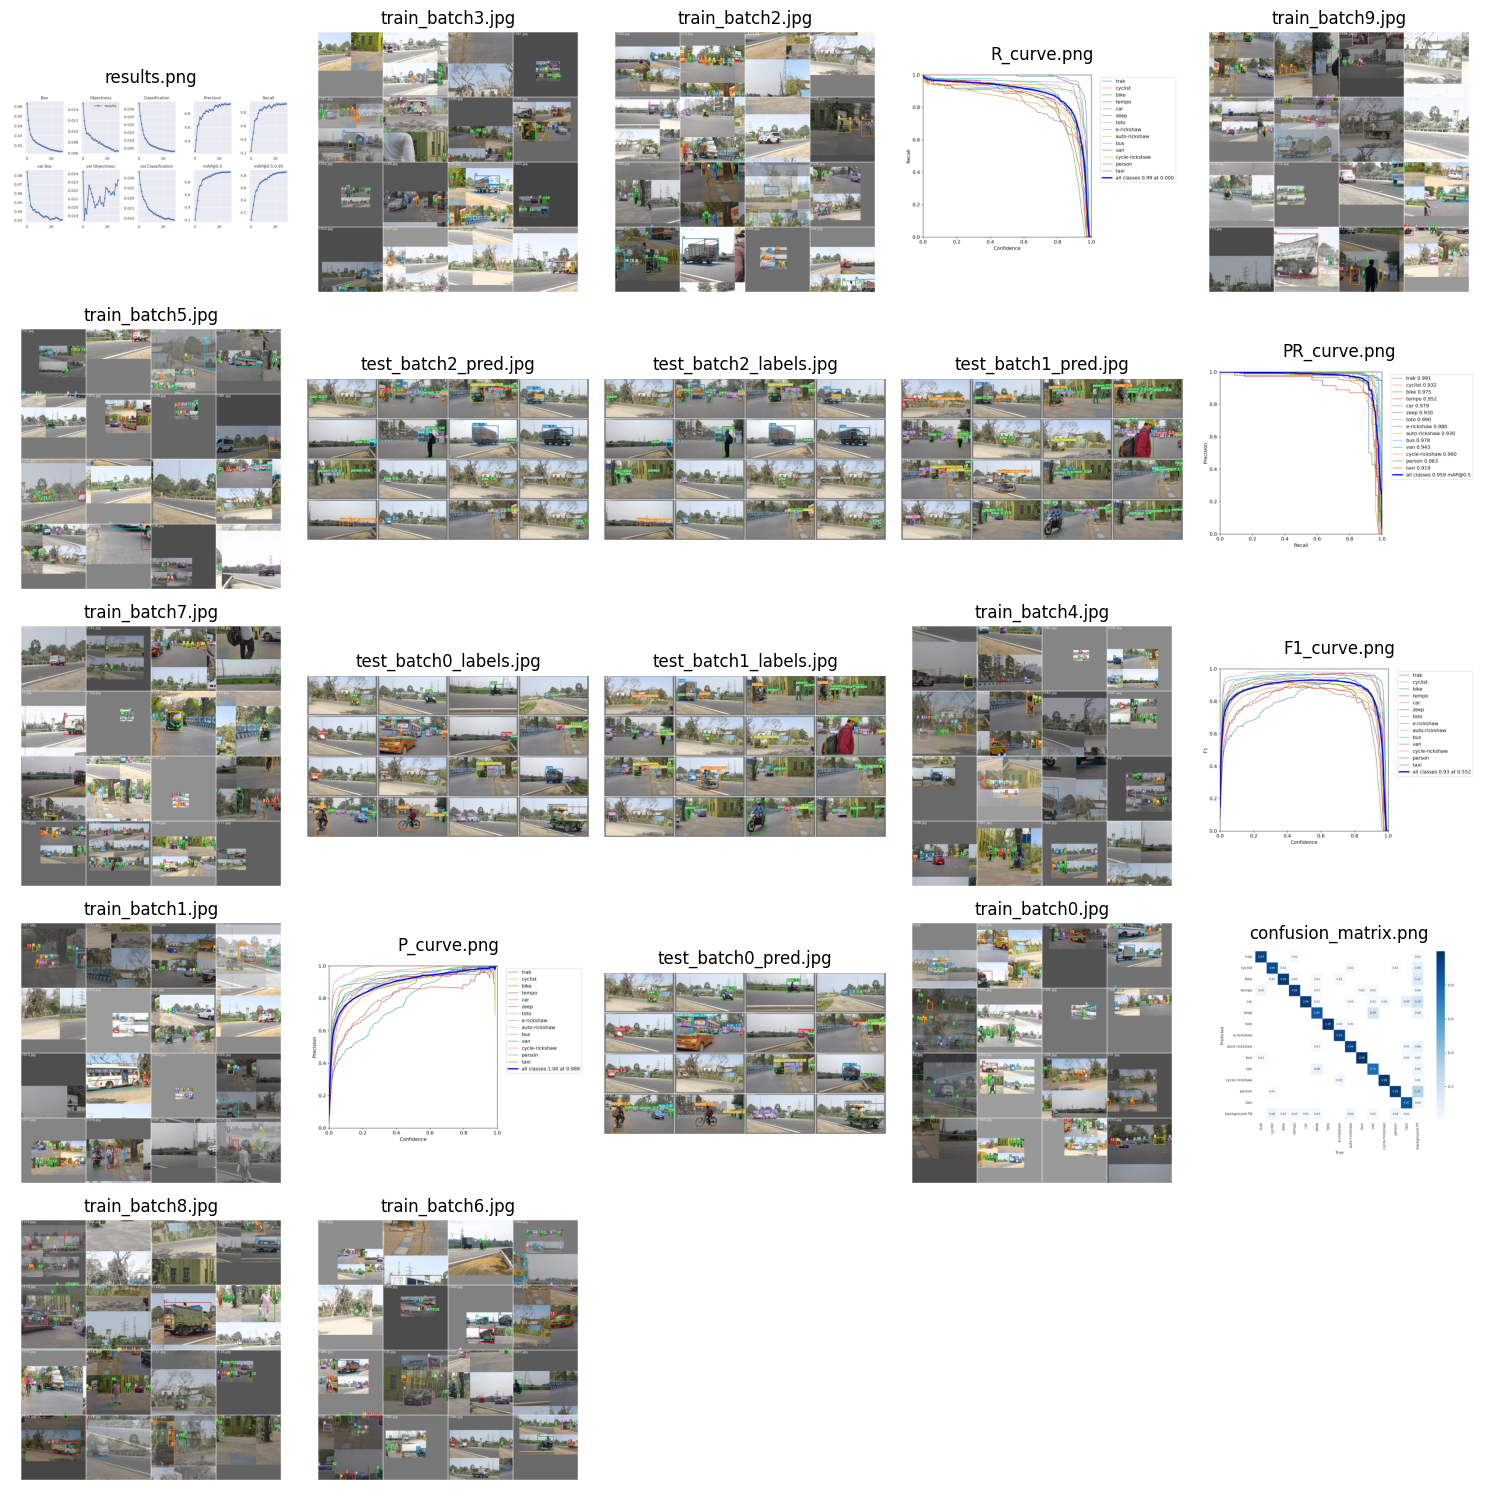

In [8]:
def display_images_from_folder(folder_path):
    """
    Finds and displays all .jpg, .png, and .jpeg images from a specified folder.
    """
    # Supported image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png')
    
    # List to store images
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]

    if not image_files:
        print("No valid images found in the specified folder.")
        return

    # Plotting images
    plt.figure(figsize=(15, 15))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(5, 5, i+1)  # Adjust the grid size (5, 5) as needed
        plt.imshow(image_rgb)
        plt.title(image_file)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
display_images_from_folder("/kaggle/working/training_backup/taffic")

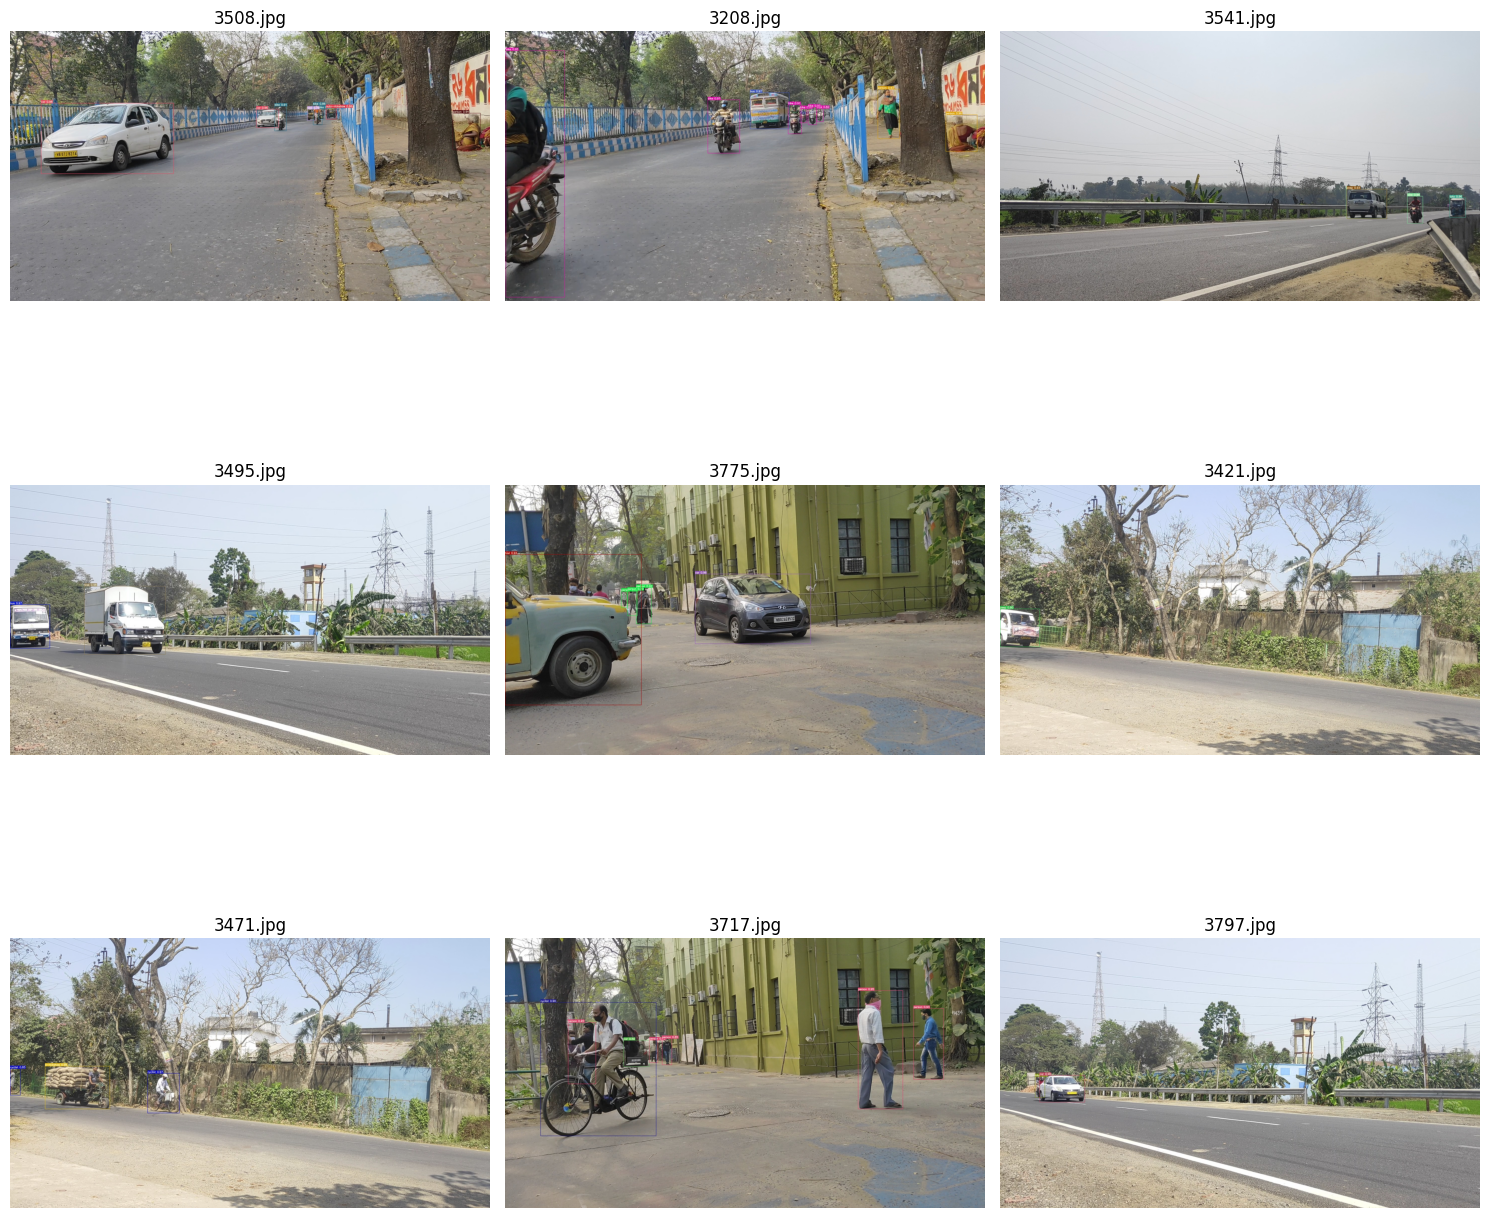

In [9]:
import subprocess
import glob

def run_yolov7(image_dir, model_path, total_image=9, output_folder="/kaggle/working/result_vis"):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get all image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    if not image_files:
        print("No images found in the directory!")
        return

    # Select images (handle case where total_image > available images)
    selected_files = random.sample(image_files, min(total_image, len(image_files)))

    result_images = []  # List to hold processed images

    for image_file in selected_files:
        image_path = os.path.join(image_dir, image_file)

        # Run YOLOv7 inference using subprocess
        command = [
            "python", "detect.py",
            "--weights", model_path,
            "--conf", "0.25",
            "--img-size", "640",
            "--source", image_path,
            "--save-txt", "--save-conf",
            "--device", "cpu"  # Force CPU mode
        ]
        
        result = subprocess.run(command, capture_output=True, text=True)

        # Check if YOLO ran successfully
        if result.returncode != 0:
            print(f"Error processing {image_file}, skipping...")
            continue

        # Get the latest YOLO output folder dynamically
        yolo_output_dirs = sorted(glob.glob("runs/detect/exp*"), key=os.path.getmtime, reverse=True)
        
        if not yolo_output_dirs:
            print(f"No YOLO output found for {image_file}, skipping...")
            continue

        latest_output_folder = yolo_output_dirs[0]
        output_image_path = os.path.join(latest_output_folder, image_file)

        if os.path.exists(output_image_path):
            result_image = cv2.imread(output_image_path)
            result_images.append(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        else:
            print(f"Processed image {image_file} not found, skipping...")

    # Display result images in a grid
    num_images = len(result_images)
    if num_images == 0:
        print("No images processed. Check YOLO output directory.")
        return

    cols = 3  # Number of columns in the grid
    rows = (num_images + cols - 1) // cols  # Calculate rows

    plt.figure(figsize=(15, 5 * rows))
    for i, img in enumerate(result_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(selected_files[i])

    plt.tight_layout()
    plt.show()

# Run function
run_yolov7(
    "/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images",
    model_path="/kaggle/working/training_backup/taffic/weights/best.pt"
)

In [10]:
!python export.py --weights /kaggle/working/training_backup/taffic/weights/best.pt --grid --end2end --simplify \
        --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(weights='/kaggle/working/training_backup/taffic/weights/best.pt', img_size=[640, 640], batch_size=1, dynamic=False, dynamic_batch=False, grid=True, end2end=True, max_wh=640, topk_all=100, iou_thres=0.65, conf_thres=0.35, device='cpu', simplify=True, include_nms=False, fp16=False, int8=False)
/kaggle/working/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless